In [1]:
import numpy as np
import pandas as pd
import os 


In [2]:

SPX_Call = pd.read_csv('SPX_Options_Call.csv')
SPX_Call = SPX_Call.drop('Unnamed: 0', axis=1)
SPX_Call.head()

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,Exp_Date,Current Date,Time to Maturity
0,SPXW191213C01950000,2019-12-04 10:47AM EST,1950,1164.00,1183.6,1189.8,0.0,-,1,9,161.62%,2019-12-13,2019-12-10,3
1,SPXW191213C02000000,2019-11-27 1:20PM EST,2000,1149.91,1133.6,1139.8,0.0,-,-,10,153.61%,2019-12-13,2019-12-10,3
2,SPXW191213C02200000,2019-12-06 3:12PM EST,2200,946.48,933.7,939.8,0.0,-,1,1,125.20%,2019-12-13,2019-12-10,3
3,SPXW191213C02480000,2019-11-18 12:03AM EST,2480,612.58,653.8,659.9,0.0,-,-,10,88.33%,2019-12-13,2019-12-10,3
4,SPXW191213C02500000,2019-10-30 10:22AM EST,2500,530.52,639.9,644.8,0.0,-,1,1,124.18%,2019-12-13,2019-12-10,3


In [3]:
SPX_Call['BID_ASK_AVG'] = ((SPX_Call['Bid'] + SPX_Call['Ask'])/2)
St = 3135.96


In [4]:
SPX_Call.head()

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,Exp_Date,Current Date,Time to Maturity,BID_ASK_AVG
0,SPXW191213C01950000,2019-12-04 10:47AM EST,1950,1164.00,1183.6,1189.8,0.0,-,1,9,161.62%,2019-12-13,2019-12-10,3,1186.70
1,SPXW191213C02000000,2019-11-27 1:20PM EST,2000,1149.91,1133.6,1139.8,0.0,-,-,10,153.61%,2019-12-13,2019-12-10,3,1136.70
2,SPXW191213C02200000,2019-12-06 3:12PM EST,2200,946.48,933.7,939.8,0.0,-,1,1,125.20%,2019-12-13,2019-12-10,3,936.75
3,SPXW191213C02480000,2019-11-18 12:03AM EST,2480,612.58,653.8,659.9,0.0,-,-,10,88.33%,2019-12-13,2019-12-10,3,656.85
4,SPXW191213C02500000,2019-10-30 10:22AM EST,2500,530.52,639.9,644.8,0.0,-,1,1,124.18%,2019-12-13,2019-12-10,3,642.35


In [5]:

def STATE_PRICE_DENSITY(C, STRIKE, St):
    '''
    CONSTRUCT A SPREAD POSITION
    LONG THE CALL AT K1 
    SHORT THE CALL AT K2
    '''
    N = len(C)
    P = np.zeros((N,1))
    for n in range(0, N-1):
        if(n==0):
            P[0] = 1-(St-C[0])/STRIKE[0]
        else:
            P[n] = 1-(C[n]-C[n-1])/(STRIKE[n]-STRIKE[n-1])    

    P[N-1] = 1- sum(P[:-1])
    P = sorted(P)
    #print(len(P))
    #print(C.shape)
    #print(STRIKE.shape)
    
    
    #SPD = (P[1:]-P[0:-1])/(STRIKE[1:]-STRIKE[0:-1])
    SPD = []
    for j in range(1, len(P)):
        state = (P[j]-P[j-1])/(STRIKE[j]-STRIKE[j-1])
        SPD.append(state)
    
    SPD = [0 if x =='NAN' else x for x in SPD]
    SPD = SPD[2:-1]
    #print(SPD)
    return SPD
    #print(len(SPD))

    

In [6]:
SPD_1016 = STATE_PRICE_DENSITY(SPX_Call['BID_ASK_AVG'],SPX_Call['Strike'],St)
SPD_1016

C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


[array([0.01242857]),
 array([0.0835]),
 array([0.7772]),
 array([0.26363636]),
 array([0.0274]),
 array([0.01725]),
 array([0.074]),
 array([0.004]),
 array([0.306]),
 array([0.03375]),
 array([0.069]),
 array([0.142]),
 array([0.522]),
 array([0.05066667]),
 array([0.952]),
 array([0.005]),
 array([0.076]),
 array([0.243]),
 array([0.1727]),
 array([0.2336]),
 array([0.006]),
 array([0.032]),
 array([0.0648]),
 array([0.0186]),
 array([0.013]),
 array([0.069]),
 array([0.02]),
 array([0.006]),
 array([0.03]),
 array([0.0016]),
 array([0.0004]),
 array([0.0004]),
 array([0.0101]),
 array([0.0095]),
 array([0.022]),
 array([0.02]),
 array([0.014]),
 array([0.058]),
 array([0.0264]),
 array([0.0036]),
 array([0.026]),
 array([0.0045]),
 array([0.0071]),
 array([0.0014]),
 array([0.0114]),
 array([0.0116]),
 array([0.0064]),
 array([0.0012]),
 array([0.0316]),
 array([0.0004]),
 array([0.0096]),
 array([0.0004]),
 array([0.0008]),
 array([0.0048]),
 array([0.0172]),
 array([0.0016]),
 ar

Text(0,0.5,'State Price Density')

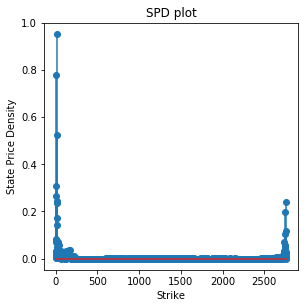

In [25]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax

plt.figure(1, figsize=(10,10))
plt.subplot(2,2,1)
plt.stem(SPD_1016)
plt.title('SPD plot')
plt.xlabel('Strike')
plt.ylabel('State Price Density')

